In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
## import required libraries ##

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [3]:
#========================================#
## Data Understanding and Exploration ##
#========================================#
## LOAD DATASET ##

df = pd.read_csv( "C:/Users/sujit/Downloads/synthetic_food_dataset_imbalanced.csv")
print("🎉Nutrition food dataset loaded successfully")


🎉Nutrition food dataset loaded successfully


In [4]:
##===========================##
 #Exploratory Data Analysis(EDA)
##===========================##
## Show first 5 rows ##
print(df.head())


     Calories    Protein        Fat      Carbs      Sugar     Fiber  \
0  290.463673  14.340084  14.152608  35.266644   4.828030  1.291432   
1  212.626748   4.080908  11.621584  23.218957  16.347814  0.130303   
2  330.695408  14.326708  19.747680  29.479164   6.251137  0.794477   
3  198.070798   9.452445   5.475896  32.097878   2.984621  1.710468   
4  274.496228   6.099547  16.256002  29.756638  17.352958  1.465676   

       Sodium  Cholesterol  Glycemic_Index  Water_Content  Serving_Size  \
0  647.553389    24.990309       81.575896      45.669118    197.570043   
1   68.572414    34.301652       69.522492      49.854415    103.833510   
2  663.171859    34.816834       62.552384      40.132866    198.989367   
3  300.749543    28.510998       68.688853      57.423461    135.714202   
4  296.314958    15.403173       70.385059      33.170460     73.019474   

  Meal_Type Preparation_Method  Is_Vegan  Is_Gluten_Free  Food_Name  
0    dinner              fried     False           F

In [5]:
##Show last 5 rows ##
print(df.tail())

         Calories    Protein        Fat      Carbs      Sugar     Fiber  \
31695  103.937793   1.251053   0.452045  27.891970  14.836599  1.835365   
31696  246.063812  10.269973  13.106895  36.416636   5.684908  1.571570   
31697  299.997105  12.431992  11.512833  33.808189   5.737315  2.901049   
31698  352.146284   9.170255   8.340631  39.261887   1.731604  0.027763   
31699  203.952826   5.322650  13.419346  26.686660  14.645211  0.295026   

           Sodium  Cholesterol  Glycemic_Index  Water_Content  Serving_Size  \
31695    2.326263     0.000000       53.690101      81.784216    120.293342   
31696  600.167326    20.839330       81.153823      41.760973    192.062481   
31697  586.095363    28.956145       75.144055      37.981317    197.318164   
31698   20.681808     7.559997       73.299415      48.435802    152.072098   
31699   62.468736    38.417093       57.987511      51.156165    113.912626   

       Meal_Type Preparation_Method  Is_Vegan  Is_Gluten_Free  Food_Name  

In [8]:
## Dataset shape (rows and col) ##
print(df.shape)


(31700, 16)


In [9]:
## Shows the column names  ##
print(df.columns)

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')


In [10]:
print(df['Meal_Type'].value_counts())

Meal_Type
snack        8001
breakfast    7970
dinner       7873
lunch        7856
Name: count, dtype: int64


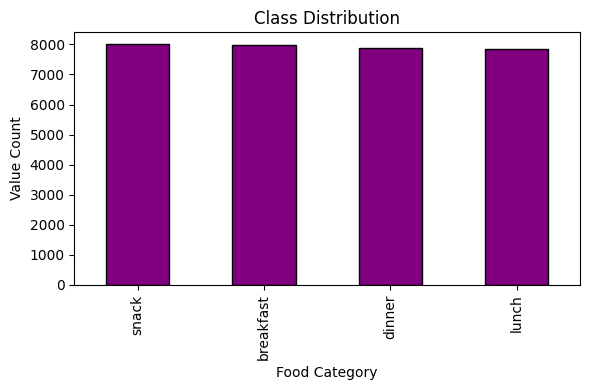

In [11]:
## Class Distribution ##
plt.figure(figsize=(6,4))
df['Meal_Type'].value_counts().plot(kind='bar',color='purple', edgecolor='black')
plt.title("Class Distribution")
plt.xlabel("Food Category")
plt.ylabel("Value Count")
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

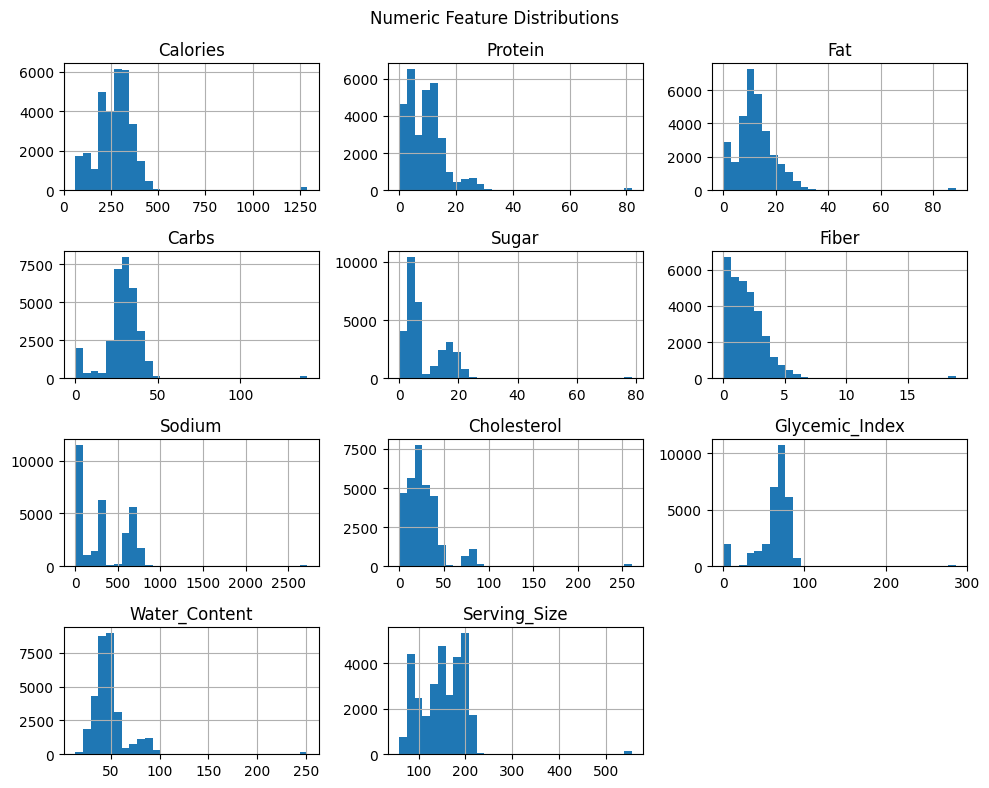

In [12]:
## Histogram for few numeric feature ##


numeric_cols= df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(10,8))
df.hist(bins=30, figsize=(10,8))
plt.suptitle("Numeric Feature Distributions")
plt.tight_layout()
plt.show()

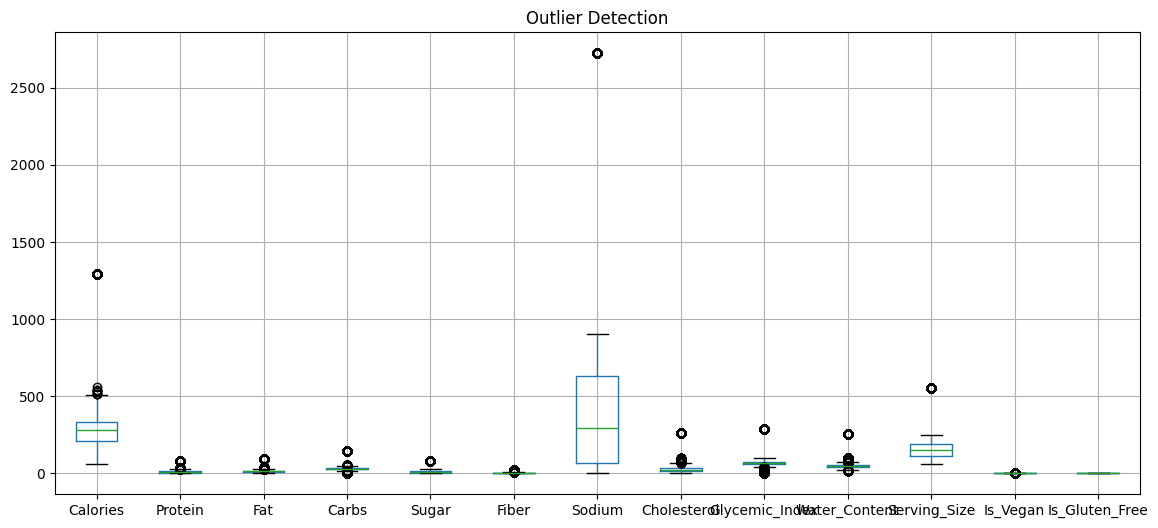

In [13]:
## Outlier visualization ##
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(14,6))
df.boxplot()
plt.title("Outlier Detection")
plt.show()

In [14]:
#=======================#
## Data Preprocessig ##
#=======================#

print(df.isnull().sum())

Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64


In [15]:
## Handling missing value ##
#Numeric -> median 
df[numeric_cols] =df [numeric_cols].fillna(df[numeric_cols].median())

# categorical -> mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
print(f"Missing values after cleaning")
print(df.isnull().sum())

Missing values after cleaning
Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64


In [16]:
print(df.shape)

(31700, 16)


In [17]:
## Remove Duplicates ##
df=df.drop_duplicates()
print(df)


         Calories    Protein        Fat      Carbs      Sugar     Fiber  \
0      290.463673  14.340084  14.152608  35.266644   4.828030  1.291432   
1      212.626748   4.080908  11.621584  23.218957  16.347814  0.130303   
2      330.695408  14.326708  19.747680  29.479164   6.251137  0.794477   
3      198.070798   9.452445   5.475896  32.097878   2.984621  1.710468   
4      274.496228   6.099547  16.256002  29.756638  17.352958  1.465676   
...           ...        ...        ...        ...        ...       ...   
31695  103.937793   1.251053   0.452045  27.891970  14.836599  1.835365   
31696  246.063812  10.269973  13.106895  36.416636   5.684908  1.571570   
31697  299.997105  12.431992  11.512833  33.808189   5.737315  2.901049   
31698  352.146284   9.170255   8.340631  39.261887   1.731604  0.027763   
31699  203.952826   5.322650  13.419346  26.686660  14.645211  0.295026   

           Sodium  Cholesterol  Glycemic_Index  Water_Content  Serving_Size  \
0      647.553389   

In [18]:
## Standardize numerical feature ##
scaler = StandardScaler()
df[numeric_cols]=scaler.fit_transform(df[numeric_cols])
print("Standardization completed")
print(df.head())

Standardization completed
   Calories   Protein       Fat     Carbs     Sugar     Fiber    Sodium  \
0  0.189181  0.679606  0.239530  0.565314 -0.486230 -0.360123  1.059021   
1 -0.579502 -0.723920 -0.090477 -0.474229  1.087823 -1.085584 -0.873471   
2  0.586492  0.677776  0.969042  0.065938 -0.291778 -0.670615  1.111152   
3 -0.723250  0.010943 -0.891782  0.291895 -0.738111 -0.098313 -0.098522   
4  0.031494 -0.447756  0.513781  0.089880  1.225165 -0.251257 -0.113324   

   Cholesterol  Glycemic_Index  Water_Content  Serving_Size Meal_Type  \
0    -0.061040        0.765305      -0.154973      0.985719    dinner   
1     0.351636        0.247214       0.070727     -0.952531     snack   
2     0.374468       -0.052381      -0.453525      1.015068     snack   
3     0.094996        0.211382       0.478902     -0.293313     lunch   
4    -0.485938        0.284290      -0.828986     -1.589693     snack   

  Preparation_Method  Is_Vegan  Is_Gluten_Free  Food_Name  
0              fried    

In [ ]:
#=========================#
## Feature Engineering ##
#=========================#

label_encoder = LabelEncoder()
df["Meal_Type"] = label_encoder.fit_transform(df["Meal_Type"])

x = df.drop("Meal_Type", axis = 1)
y = df["Meal_Type"]

## PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(df[numeric_cols])
print("PCA Reduced Shape:", X_pca.shape)

PCA Reduced Shape: (31387, 6)


In [20]:
## Train Test Split ## 
X_train, X_test, y_train, y_test= train_test_split(X_pca, y, test_size=0.2, random_state=42)
print("Train-Test-Split completed")

Train-Test-Split completed


In [ ]:
#===================================#
## Model Selection And Training ##
#===================================#

models = {"Logistic Regression": LogisticRegression(max_iter=300),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "SVM": SVC(),
          "XGBoost": XGBClassifier(),
          "Gradient Boosting": GradientBoostingClassifier()
         }
results = []
for name , model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    results.append([name, acc, prec, rec, f1])
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision', 'Recall','F1 Score'])
    print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.251035   0.245377  0.253396  0.195361
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.251035   0.245377  0.253396  0.195361
1        Decision Tree  0.241956   0.242112  0.241977  0.241963
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.251035   0.245377  0.253396  0.195361
1        Decision Tree  0.241956   0.242112  0.241977  0.241963
2        Random Forest  0.242115   0.242248  0.242158  0.242161
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.251035   0.245377  0.253396  0.195361
1        Decision Tree  0.241956   0.242112  0.241977  0.241963
2        Random Forest  0.242115   0.242248  0.242158  0.242161
3                  KNN  0.239248   0.236427  0.238660  0.234117
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.251035   0.245

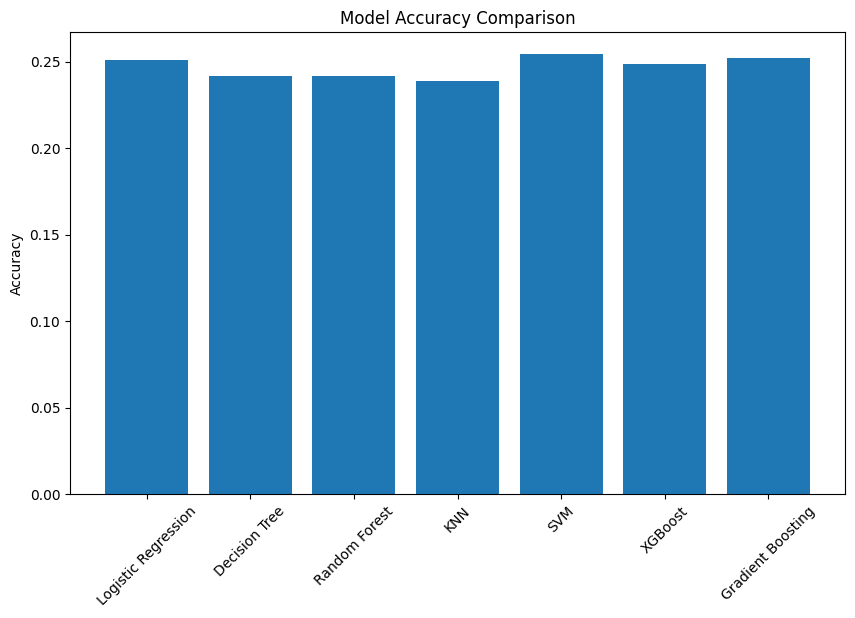

In [22]:
plt.figure(figsize=(10,6))
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title("Model Accuracy Comparison")
plt.show()

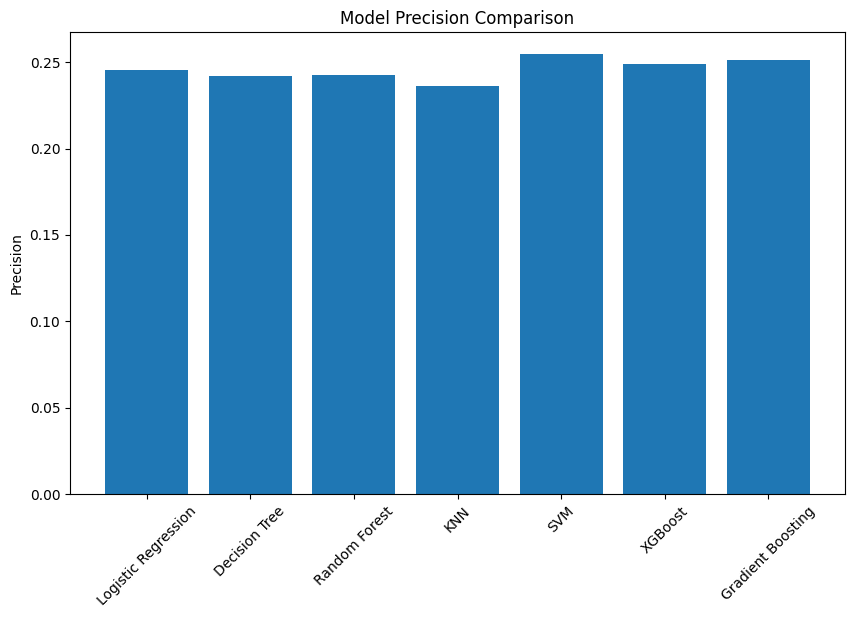

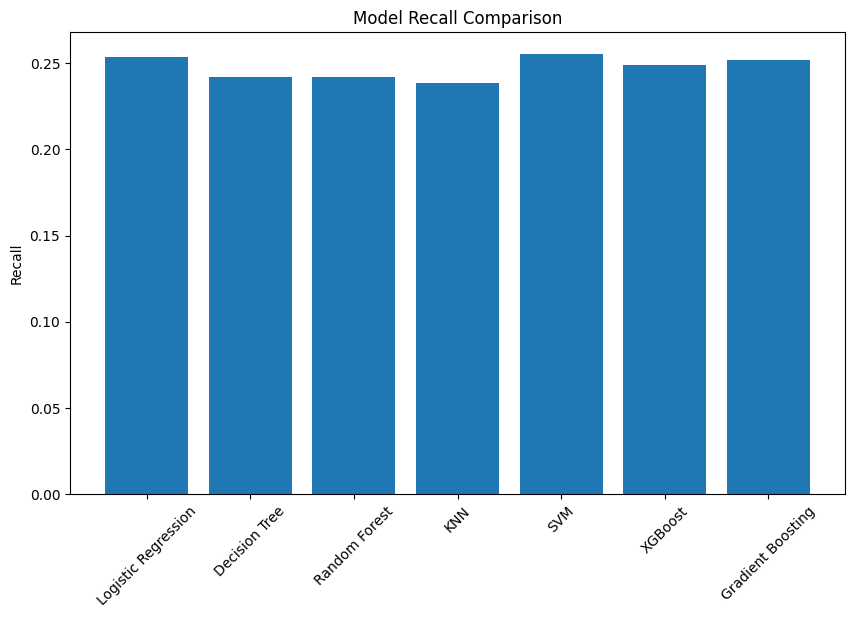

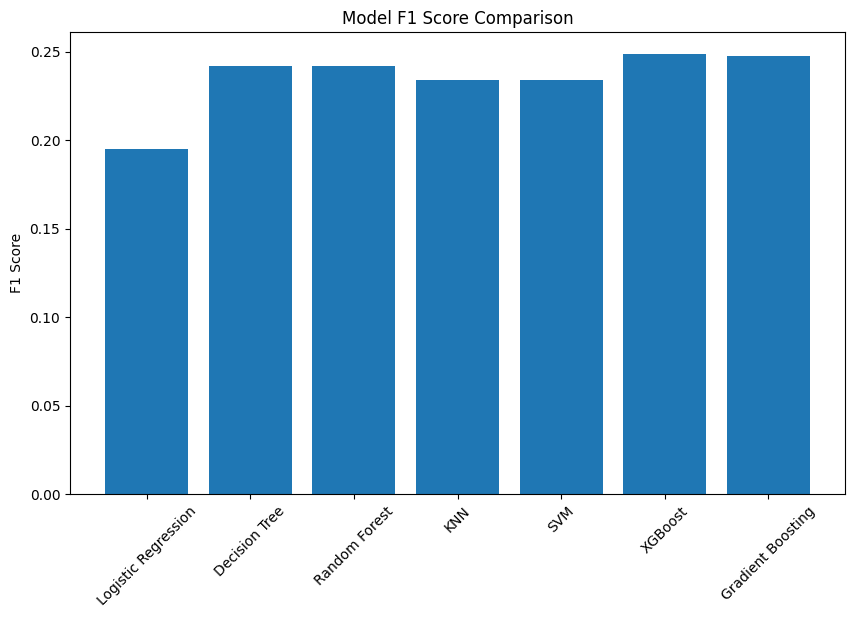

In [23]:
metrics = ['Precision', 'Recall', 'F1 Score']
for m in metrics:
    plt.figure(figsize=(10,6))
    plt.bar(results_df['Model'], results_df[m])
    plt.xticks(rotation=45)
    plt.ylabel(m)
    plt.title(f'Model {m} Comparison')
    plt.show()

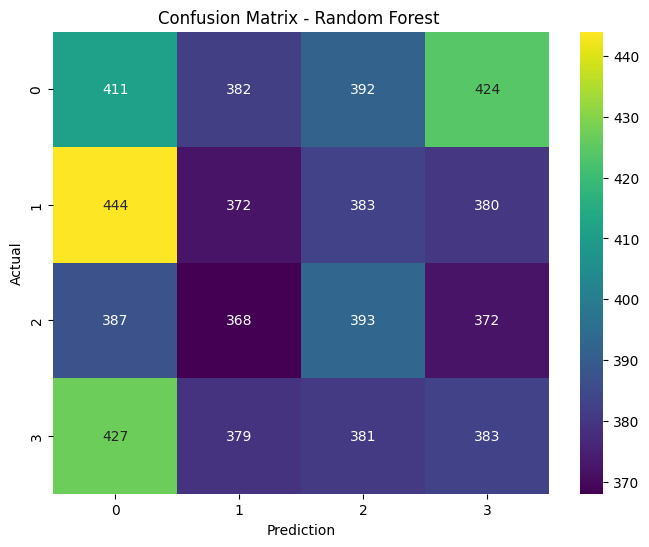

In [24]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="viridis", fmt='g')
plt.title("Confusion Matrix - Random Forest ")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()